###TASK 1

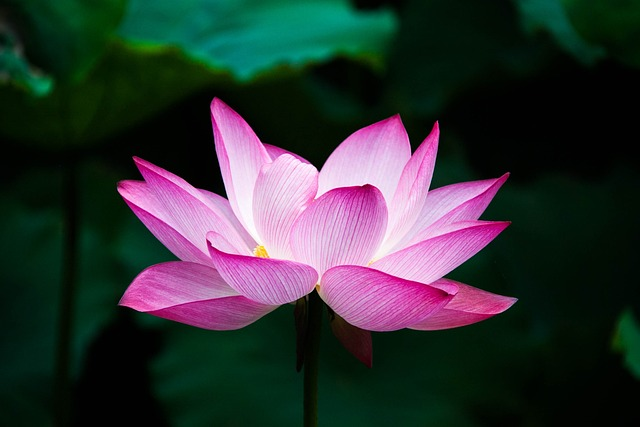

In [3]:
!pip install opencv-python
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('sample_data/CV lab3 pic.jpg')
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [14]:
height, width, channels = image.shape
print("Image Size:" , height,"X",width, "Channels: ",channels)

total_pixels = height * width
print("Total Pixels: ",total_pixels)

Image Size: 427 X 640 Channels:  3
Total Pixels:  273280


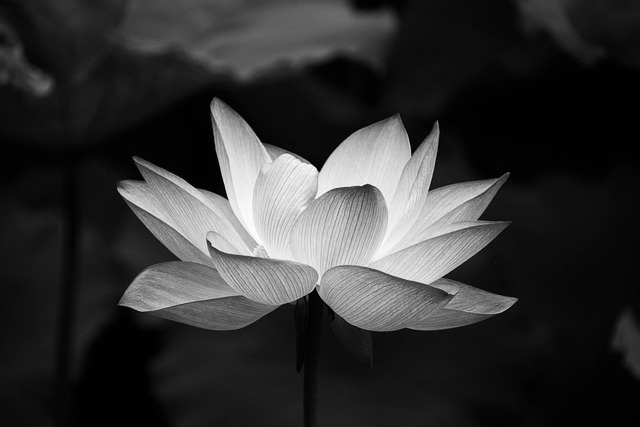

Black Pixels:  273182


In [25]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
gray_image.shape

black_pixels = cv2.countNonZero(gray_image)
print("Black Pixels: ",black_pixels)

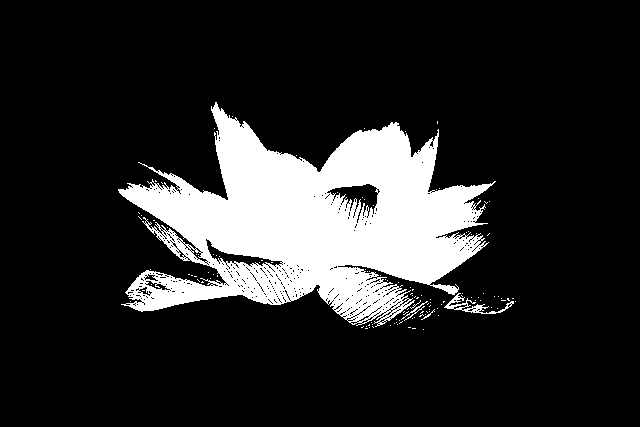

Black Pixels:  44142


In [24]:
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
binary_image.shape

black_pixels = cv2.countNonZero(binary_image)
print("Black Pixels: ",black_pixels)

###TASK 2


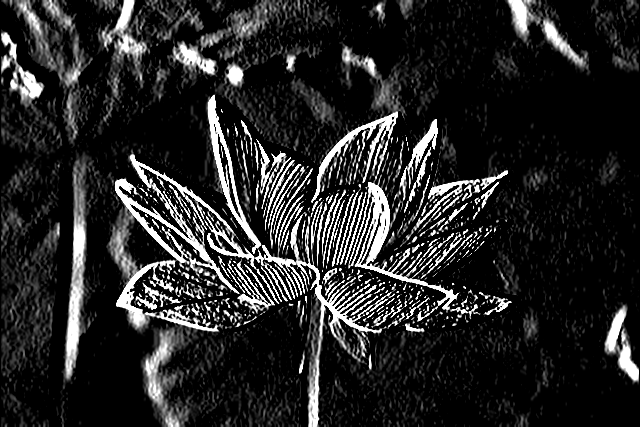

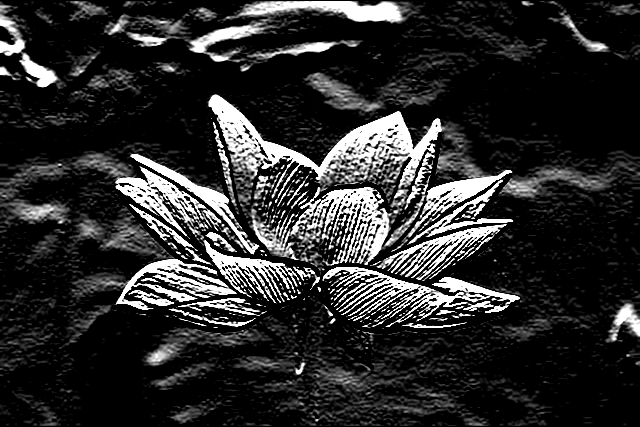

In [41]:
#Sobel Edge Detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
#cv2_imshow(sobel_combined)
cv2_imshow(sobel_x)
print("\n")
cv2_imshow(sobel_y)
cv2.waitKey(0)
cv2.destroyAllWindows()

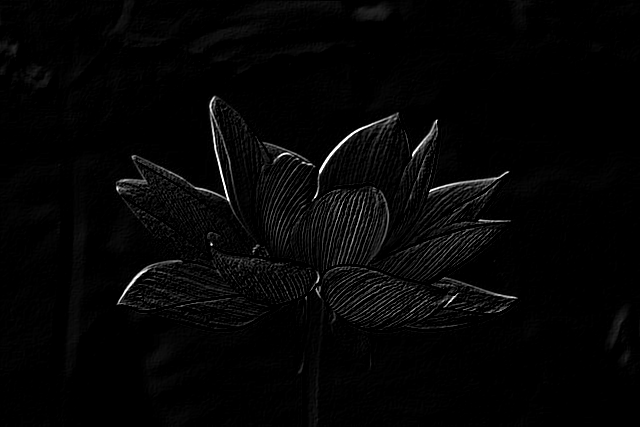

In [29]:
#Prewitt Edge Detection
prewitt_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
prewitt_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
prewitt_combined = cv2.addWeighted(prewitt_x, 0.5, prewitt_y, 0.5, 0)
cv2_imshow(prewitt_combined)
cv2.waitKey(0)
cv2.destroyAllWindows()

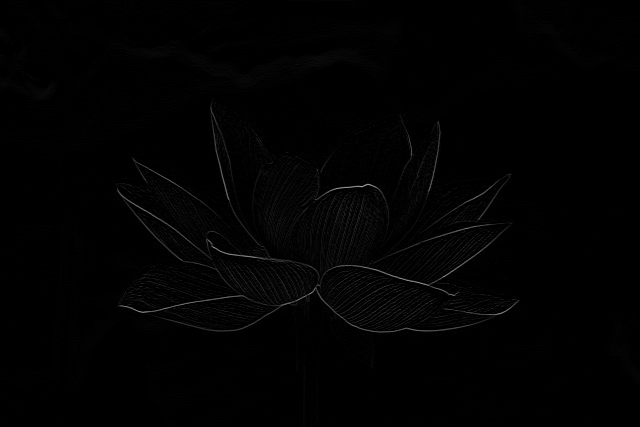

In [33]:
#Roberts Edge Detection
import numpy as np
kernel_x = np.array([[1, 0], [0, -1]])
kernel_y = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(gray_image, -1, kernel_x)
roberts_y = cv2.filter2D(gray_image, -1, kernel_y)
roberts_combined = cv2.addWeighted(roberts_x, 0.5, roberts_y, 0.5, 0)
cv2_imshow( roberts_combined)
cv2.waitKey(0)
cv2.destroyAllWindows()

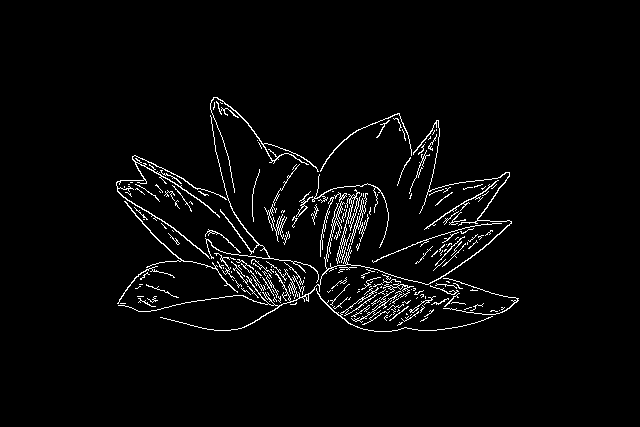

In [35]:
#Canny Edge Detection
edges = cv2.Canny(gray_image, 100, 200)
cv2_imshow( edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

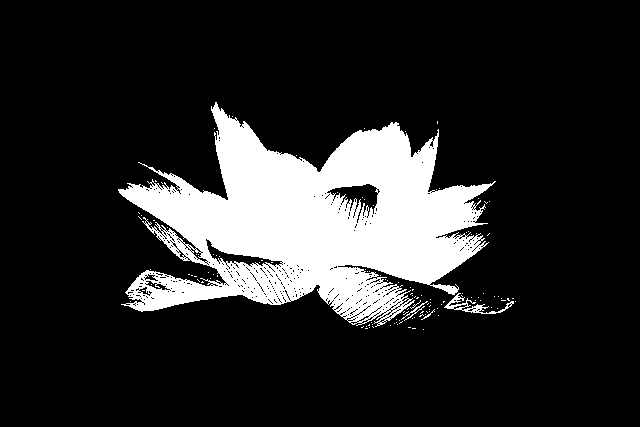

In [36]:
#Global Thresholding
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2_imshow( global_thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

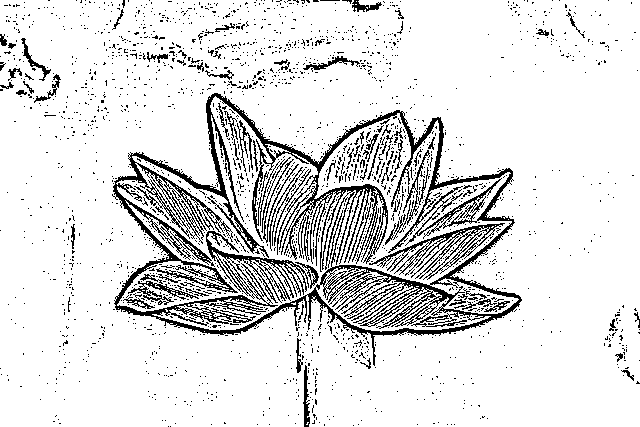

In [37]:
#Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
cv2_imshow(adaptive_thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

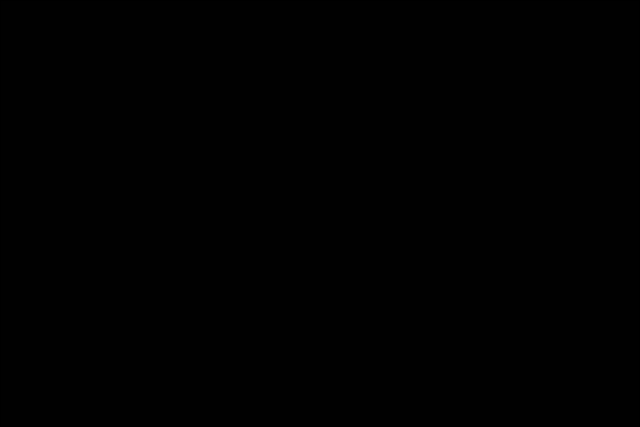

In [43]:
#Watershed Segmentation
_, markers = cv2.connectedComponents(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
markers = cv2.watershed(image, markers)
cv2_imshow(markers)
cv2.waitKey(0)
cv2.destroyAllWindows()